In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder

In [49]:
files = os.listdir('./data')
dfs = []
for file in files:
    if file.endswith('.csv'):
        file_path = os.path.join('./data', file)
        df = pd.read_csv(file_path)
        df.rename(columns=lambda x: x.strip().lower(), inplace=True)
        dfs.append(df)

delitos = pd.concat(dfs, ignore_index=True)

print("# Data loaded successfully.")
print(f"    Total number of records: {len(delitos)}")

print("\n# First few records:")
print(delitos.head())

print("\n# Dataframe information:")
print(delitos.info())

print("\n# Descriptive statistics:")
print(delitos.describe())

# Data loaded successfully.
    Total number of records: 48444

# First few records:
    periodo_denuncia  anio_denuncia fecha_descarga distrito_fiscal  \
0  ENERO - DICIEMBRE           2019     13/01/2020        AMAZONAS   
1  ENERO - DICIEMBRE           2019     13/01/2020        AMAZONAS   
2  ENERO - DICIEMBRE           2019     13/01/2020        AMAZONAS   
3  ENERO - DICIEMBRE           2019     13/01/2020        AMAZONAS   
4  ENERO - DICIEMBRE           2019     13/01/2020        AMAZONAS   

  especialidad tipo_caso         generico  \
0        PENAL  DENUNCIA  CONTRA EL HONOR   
1        PENAL  DENUNCIA  CONTRA EL HONOR   
2        PENAL  DENUNCIA  CONTRA EL HONOR   
3        PENAL  DENUNCIA  CONTRA EL HONOR   
4        PENAL  DENUNCIA  CONTRA EL HONOR   

                                         subgenerico articulo  \
0  CONTRA EL HONOR (Sin especificar delito subgen...    S/Art   
1                      INJURIA,CALUMNIA Y DIFAMACION      130   
2                      INJUR

# Variability Analysis

In [50]:
# Unique values in dataset")
print("\n# Unique values in dataset:")
print(delitos.nunique())


# Unique values in dataset:
periodo_denuncia       1
anio_denuncia          5
fecha_descarga         5
distrito_fiscal       34
especialidad           1
tipo_caso              1
generico              28
subgenerico          112
articulo             463
des_articulo         557
cantidad            1643
ubigeo_pjfs           34
dpto_pjfs             25
prov_pjfs             30
dist_pjfs             34
fecha_corte            3
dtype: int64


In [51]:
constantes = delitos.columns[delitos.nunique() == 1]
print("\n# Columns with constant values:")
for col in constantes:
    print(f"    {col}: {delitos[col].unique()[0]}")


# Columns with constant values:
    periodo_denuncia: ENERO - DICIEMBRE
    especialidad: PENAL
    tipo_caso: DENUNCIA


In [52]:
# Delete columns with constant values
delitos.drop(columns=constantes, inplace=True)

# Adjust variable type

In [53]:
to_categorical = ['distrito_fiscal','generico', 'subgenerico', 'des_articulo',
    'dpto_pjfs', 'prov_pjfs', 'dist_pjfs', 'articulo', 'ubigeo_pjfs']
for col in to_categorical:
    if col in delitos.columns:
        delitos[col] = delitos[col].astype('category')
        print(f"Converted {col} to category type.")

# Delete fecha_corte column as it is not needed
delitos.drop(columns=['fecha_corte', 'fecha_descarga'], inplace=True)
delitos.info()

Converted distrito_fiscal to category type.
Converted generico to category type.
Converted subgenerico to category type.
Converted des_articulo to category type.
Converted dpto_pjfs to category type.
Converted prov_pjfs to category type.
Converted dist_pjfs to category type.
Converted articulo to category type.
Converted ubigeo_pjfs to category type.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48444 entries, 0 to 48443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   anio_denuncia    48444 non-null  int64   
 1   distrito_fiscal  48444 non-null  category
 2   generico         48444 non-null  category
 3   subgenerico      48444 non-null  category
 4   articulo         48444 non-null  category
 5   des_articulo     48444 non-null  category
 6   cantidad         48444 non-null  int64   
 7   ubigeo_pjfs      48444 non-null  category
 8   dpto_pjfs        48444 non-null  category
 9   prov_pjfs       

In [63]:
newdfdelitos = delitos.copy()
newdfdelitos['subgenerico'] = delitos['subgenerico'].str.replace(r"\s*\(Sin especificar delito subgenérico\)", "", regex=True).str.strip()
print(f"Subgenericos original: {len(delitos["subgenerico"].value_counts())}")
print(f"Subgenericos new: {len(newdfdelitos["subgenerico"].value_counts())}")


Subgenericos original: 113
Subgenericos new: 112


# Distribution of numerical variables


# Numerical columns for distribution analysis:
    anio_denuncia
    cantidad


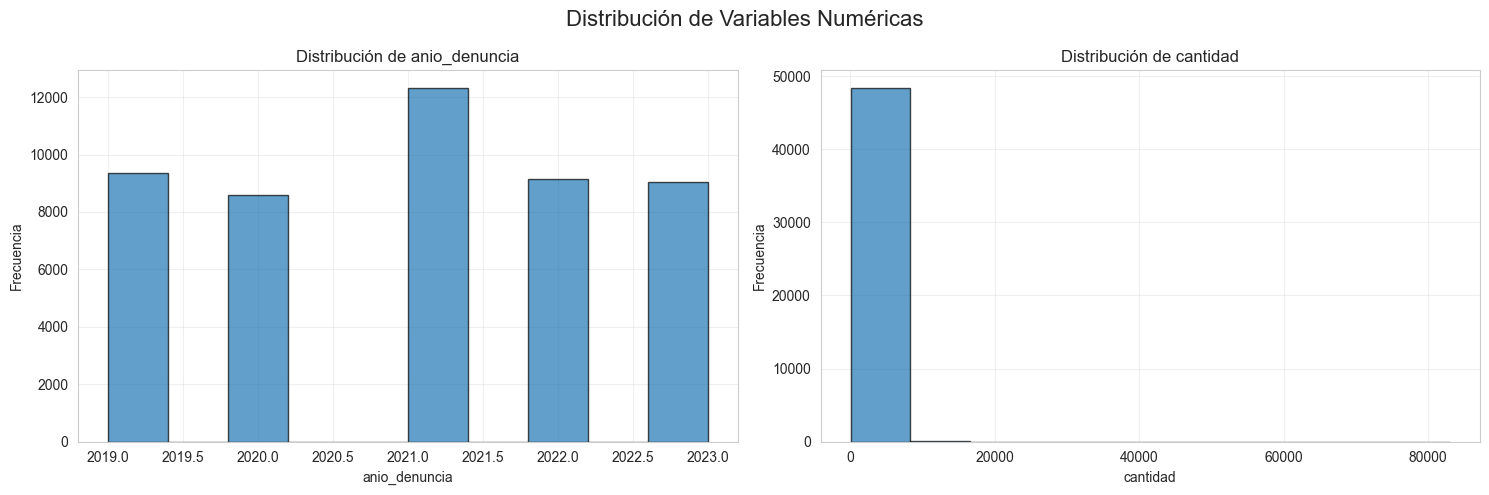

In [55]:
# Select numerical columns for distribution analysis
numeric_cols = delitos.select_dtypes(include=[np.number]).columns

print("\n# Numerical columns for distribution analysis:")
for col in numeric_cols:
    print(f"    {col}")

# Length of numerical columns
n = len(numeric_cols)

if n > 0:
    ncols = n 
    nrows = (n + ncols - 1) // ncols  # Calculate number of rows needed
    
    # Create subplots for each numerical variable
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5*nrows))
    fig.suptitle('Distribución de Variables Numéricas', fontsize=16)

    # Ensure axes is a 2D array    
    if nrows == 1 and ncols == 1:
        axes = [axes]  # Convert single Axes to a list
    elif nrows == 1 or ncols == 1:
        axes = axes.flatten()  # Convert 1D array to a list
    else:
        axes = axes.flatten()  # Flatten 2D array to a list
    
    # Plot histograms for each numerical variable
    for i, col in enumerate(numeric_cols):
        ax = axes[i]
        delitos[col].hist(ax=ax, edgecolor='black', alpha=0.7)
        ax.set_title(f'Distribución de {col}', fontsize=12)
        ax.set_xlabel(col)
        ax.set_ylabel('Frecuencia')
        ax.grid(True, alpha=0.3)
    
    # Remove empty subplots if any
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron columnas numéricas en el DataFrame.")

# Distribution of categorical variables


# Categorical variables:
    distrito_fiscal: ['AMAZONAS', 'ANCASH', 'APURIMAC', 'AREQUIPA', 'AYACUCHO', ..., 'SELVA CENTRAL', 'SULLANA', 'TACNA', 'TUMBES', 'UCAYALI']
Length: 34
Categories (34, object): ['AMAZONAS', 'ANCASH', 'APURIMAC', 'AREQUIPA', ..., 'SULLANA', 'TACNA', 'TUMBES', 'UCAYALI']
    generico: ['CONTRA EL HONOR', 'CONTRA EL ORDEN ECONOMICO', 'CONTRA EL ORDEN FINANCIERO Y MONETARIO', 'CONTRA EL PATRIMONIO', 'CONTRA EL PATRIMONIO CULTURAL', ..., 'LEY Nº 30096, LEY DE DELITOS INFORMATICOS', 'CONTRA EL ESTADO Y LA DEFENSA NACIONAL', 'NO TIPIFICADOS', 'TENTATIVA', 'CONTRA LA DIGNIDAD HUMANA']
Length: 28
Categories (28, object): ['CONTRA EL ESTADO Y LA DEFENSA NACIONAL', 'CONTRA EL HONOR', 'CONTRA EL ORDEN ECONOMICO', 'CONTRA EL ORDEN FINANCIERO Y MONETARIO', ..., 'LEY 26859, LEY ORGANICA DE ELECCIONES', 'LEY Nº 30096, LEY DE DELITOS INFORMATICOS', 'NO TIPIFICADOS', 'TENTATIVA']
    subgenerico: ['CONTRA EL HONOR (Sin especificar delito subge..., 'INJURIA,CALUMNIA Y DIFAMACI

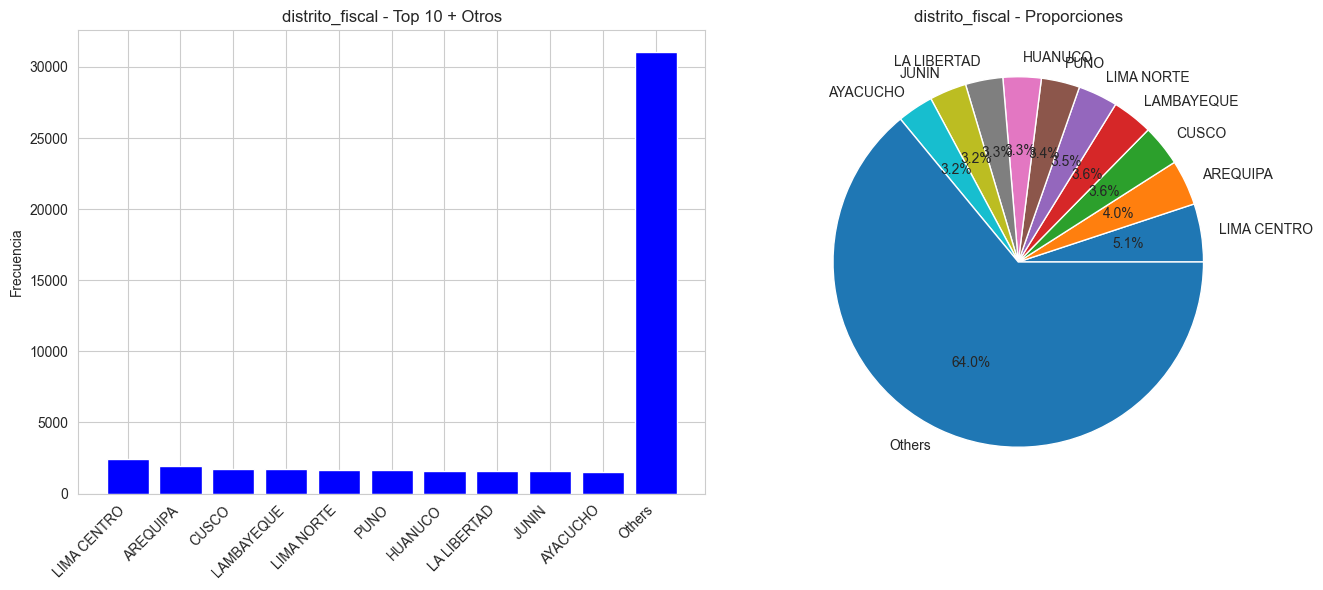


generico:
  - Unique: 28
  - Most frequent: CONTRA LA ADMINISTRACION PUBLICA (9750 cases)
  - Nulls: 0
Truncated 18 categories in column generico to 20 characters.
Grouping 18 categories into 'Others'

Top 10 categories for generico:
generico
CONTRA LA ADMINISTRA    9750
CONTRA EL PATRIMONIO    6283
CONTRA LA LIBERTAD      6249
CONTRA LA SEGURIDAD     5340
CONTRA LA VIDA/EL CU    5011
DELITOS AMBIENTALES     2667
CONTRA LA FE PUBLICA    1846
LEY Nº 30096, LEY DE    1470
CONTRA LA TRANQUILID    1387
CONTRA LA FAMILIA       1345
Name: count, dtype: int64
Other categories grouped as 'Others' (28).


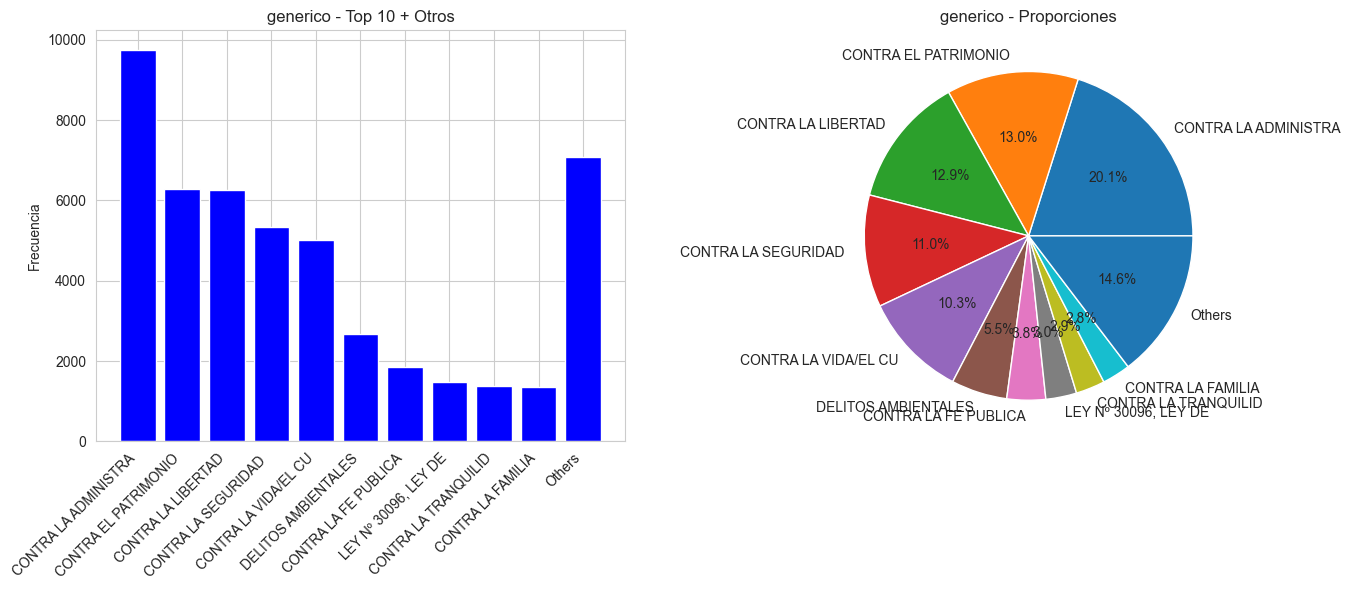


subgenerico:
  - Unique: 112
  - Most frequent: DELITOS COMETIDOS POR FUNCIONARIOS PUBLICOS (4235 cases)
  - Nulls: 0
Truncated 83 categories in column subgenerico to 20 characters.
Grouping 102 categories into 'Others'

Top 10 categories for subgenerico:
subgenerico
DELITOS COMETIDOS PO    4235
DELITOS CONTRA LA AD    2986
CONTRA LA SALUD PUBL    2634
DELITOS COMETIDOS PO    2384
VIOLACION DE LA LIBE    2145
DELITO DE PELIGRO CO    1925
LESIONES                1664
HOMICIDIO               1622
DELITOS CONTRA LOS R    1373
VIOLACION DE LA LIBE    1206
Name: count, dtype: int64
Other categories grouped as 'Others' (112).


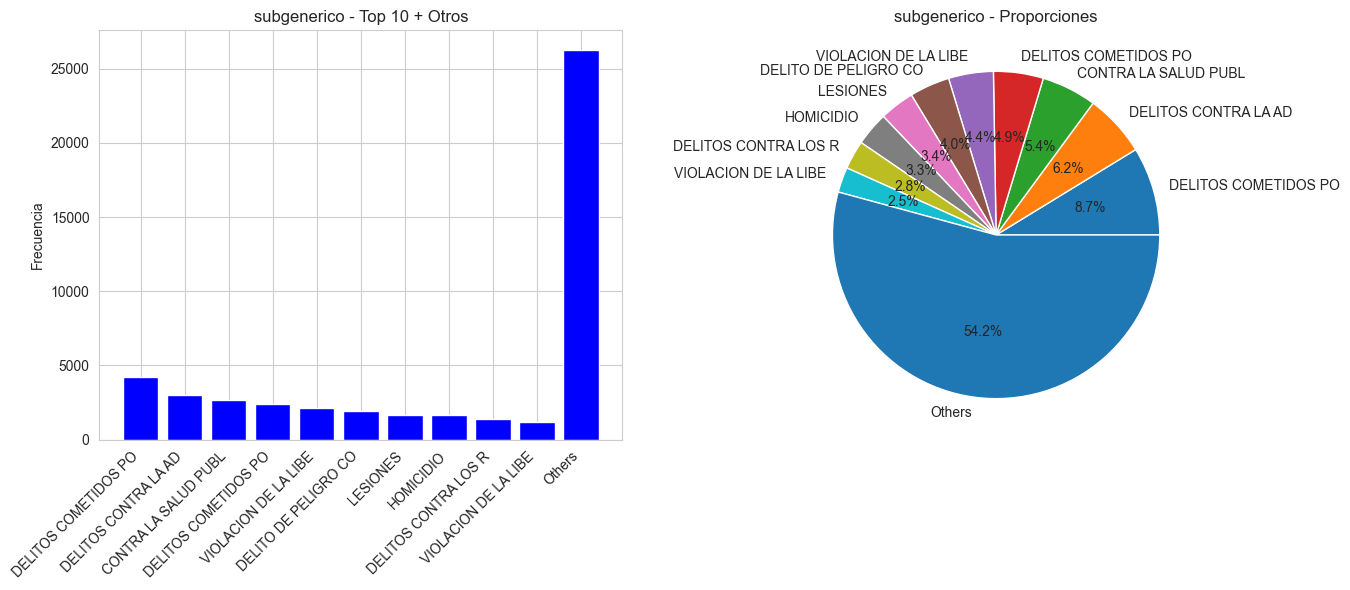


articulo:
  - Unique: 463
  - Most frequent: S/Art (6949 cases)
  - Nulls: 0
Truncated 0 categories in column articulo to 20 characters.
Grouping 453 categories into 'Others'

Top 10 categories for articulo:
articulo
S/Art    6949
2         416
8         258
1         246
202       222
122-B     218
204       218
376       216
427       216
205       215
Name: count, dtype: int64
Other categories grouped as 'Others' (463).


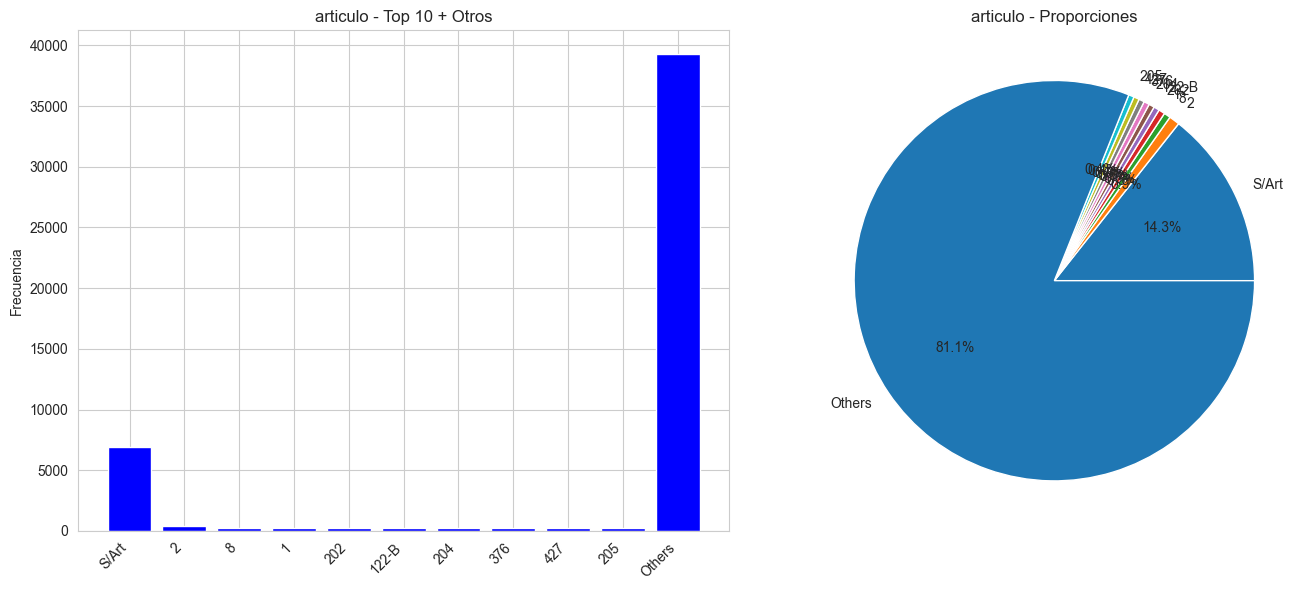


des_articulo:
  - Unique: 557
  - Most frequent: Formas agravadas (995 cases)
  - Nulls: 0
Truncated 434 categories in column des_articulo to 20 characters.
Grouping 547 categories into 'Others'

Top 10 categories for des_articulo:
des_articulo
Formas agravadas        995
Usurpación.             222
Formas agravadas de     218
Agresiones en contra    218
Abuso de autoridad      216
Falsificación de doc    216
Daño simple             215
Estafa                  214
Robo agravado           213
Hurto agravado          212
Name: count, dtype: int64
Other categories grouped as 'Others' (557).


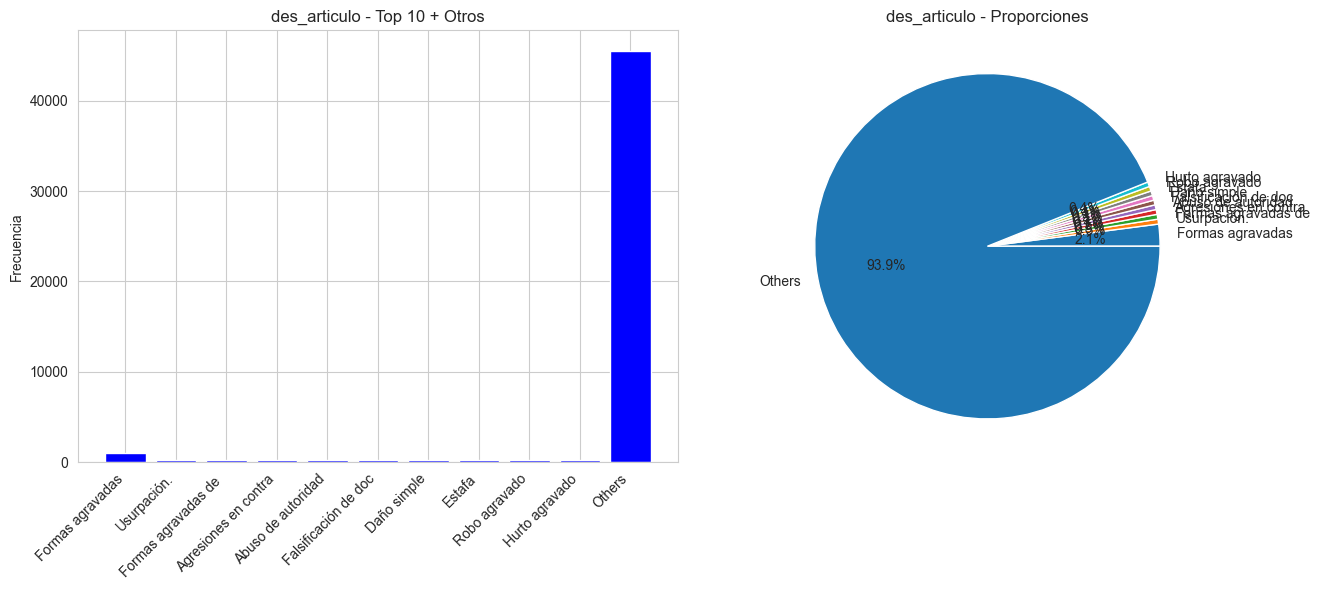


ubigeo_pjfs:
  - Unique: 34
  - Most frequent: 150101 (2458 cases)
  - Nulls: 0
Truncated 0 categories in column ubigeo_pjfs to 20 characters.
Grouping 24 categories into 'Others'

Top 10 categories for ubigeo_pjfs:
ubigeo_pjfs
150101    2458
40101     1922
80108     1742
140101    1723
150112    1672
210101    1626
100101    1613
130101    1582
120114    1562
50110     1528
Name: count, dtype: int64
Other categories grouped as 'Others' (34).


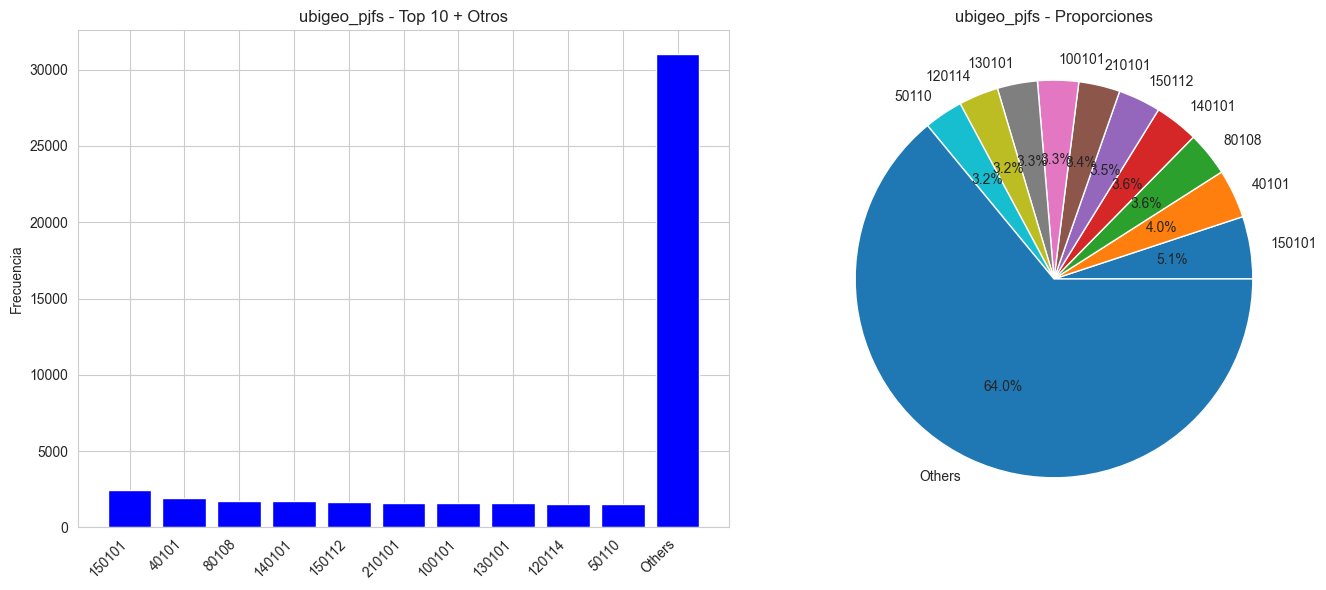


dpto_pjfs:
  - Unique: 25
  - Most frequent: LIMA (9441 cases)
  - Nulls: 0
Truncated 0 categories in column dpto_pjfs to 20 characters.
Grouping 15 categories into 'Others'

Top 10 categories for dpto_pjfs:
dpto_pjfs
LIMA          9441
ANCASH        2814
JUNIN         2682
PIURA         2657
CALLAO        2612
AREQUIPA      1922
CUSCO         1742
LAMBAYEQUE    1723
PUNO          1626
HUANUCO       1613
Name: count, dtype: int64
Other categories grouped as 'Others' (25).


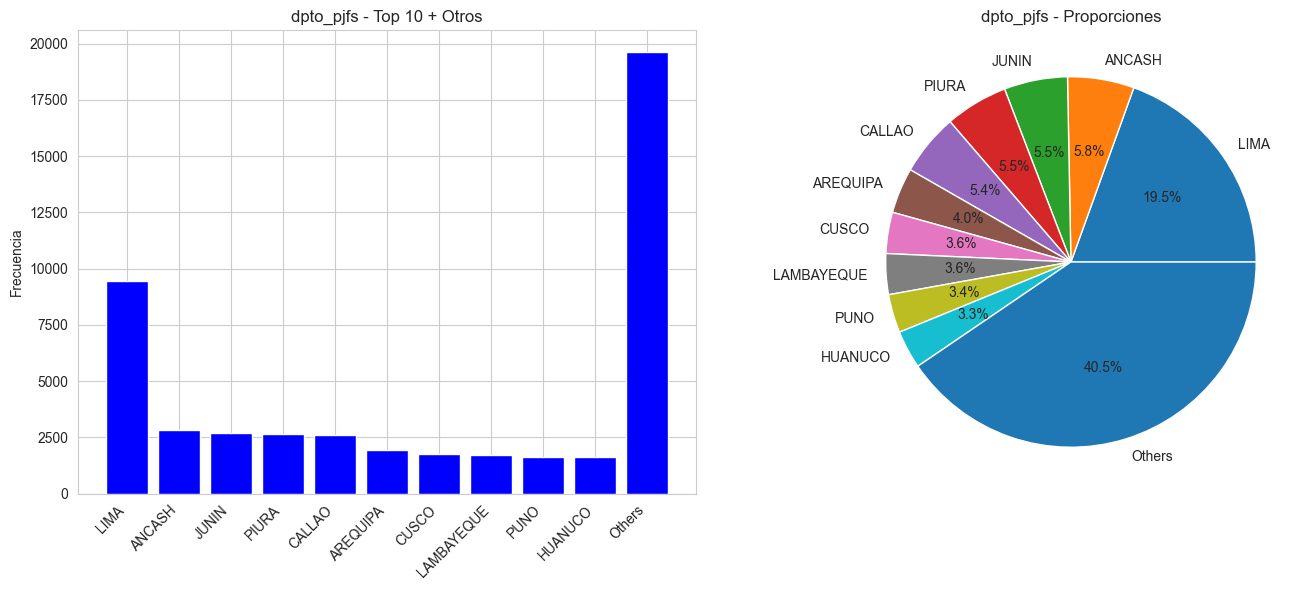


prov_pjfs:
  - Unique: 30
  - Most frequent: LIMA (7049 cases)
  - Nulls: 0
Truncated 0 categories in column prov_pjfs to 20 characters.
Grouping 20 categories into 'Others'

Top 10 categories for prov_pjfs:
prov_pjfs
LIMA        7049
CALLAO      2612
AREQUIPA    1922
CUSCO       1742
CHICLAYO    1723
PUNO        1626
HUANUCO     1613
TRUJILLO    1582
HUANCAYO    1562
HUAMANGA    1528
Name: count, dtype: int64
Other categories grouped as 'Others' (30).


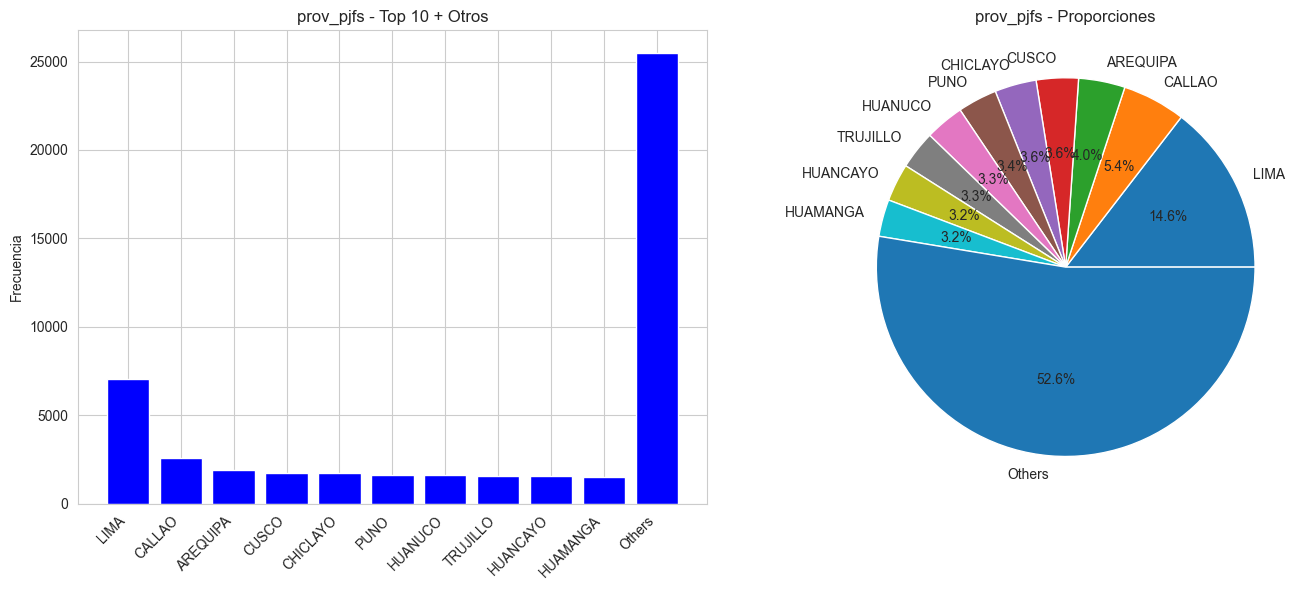


dist_pjfs:
  - Unique: 34
  - Most frequent: LIMA (2458 cases)
  - Nulls: 0
Truncated 1 categories in column dist_pjfs to 20 characters.
Grouping 24 categories into 'Others'

Top 10 categories for dist_pjfs:
dist_pjfs
LIMA                 2458
AREQUIPA             1922
WANCHAQ              1742
CHICLAYO             1723
INDEPENDENCIA        1672
PUNO                 1626
HUANUCO              1613
TRUJILLO             1582
EL TAMBO             1562
SAN JUAN BAUTISTA    1528
Name: count, dtype: int64
Other categories grouped as 'Others' (34).


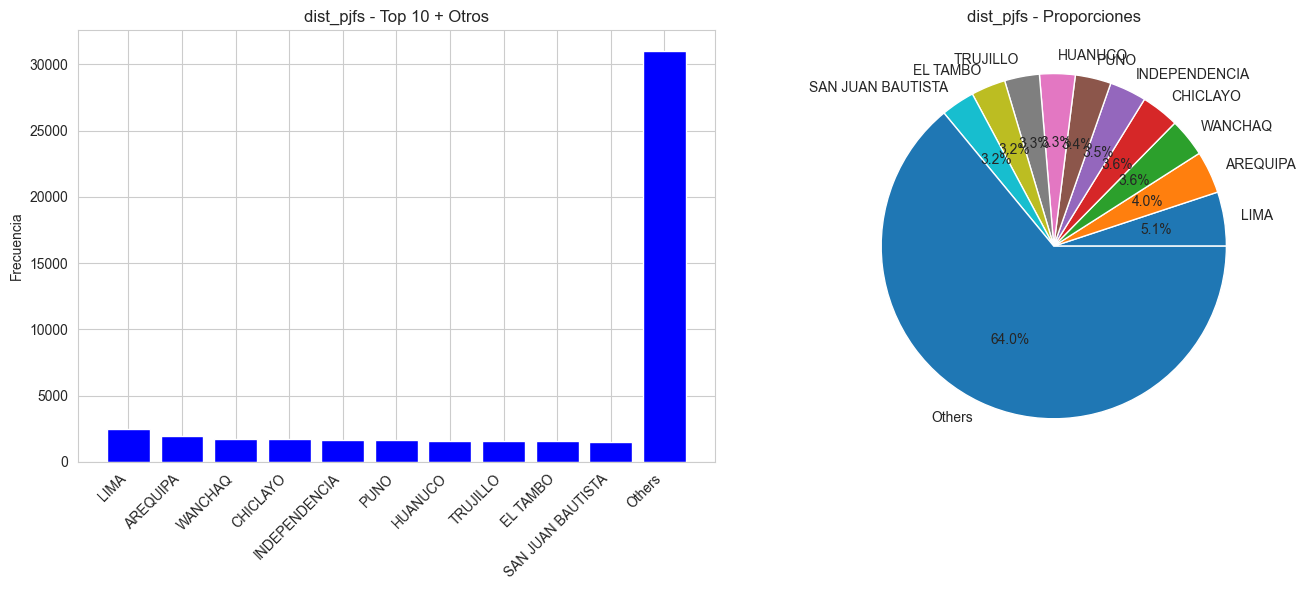

In [56]:
def create_top_with_others(df, col, top_n=10):
    """
    Create a new column with the top N categories and 'Others' for the rest.
    """
    counts = df[col].value_counts()
    
    truncated_cols = 0
    for index in counts.index:
        # Check if the index is a string and truncate if necessary
        if isinstance(index, str) and len(index) > 20:
            truncated_cols += 1
            counts.rename(index={index: index[:20]}, inplace=True)
    
    print(f"Truncated {truncated_cols} categories in column {col} to 20 characters.")

    if len(counts) <= top_n:
        print(f"Column {col} has {len(counts)} unique categories, which is less than or equal to {top_n}. No grouping needed.")
        return counts.index, counts
    
    top_categories = counts.head(top_n)
    print(f"Grouping {len(counts) - top_n} categories into 'Others'")
    plot_data = pd.concat([top_categories, pd.Series({'Others': counts.iloc[top_n:].sum()})])

    print(f"\nTop {top_n} categories for {col}:")
    print(counts.head(top_n))
    if len(counts) > top_n:
        print(f"Other categories grouped as 'Others' ({len(counts - top_n)}).")
    
    return top_categories.index, plot_data

# Distribution of categorical variables
categorical_columns = delitos.select_dtypes(include=['category']).columns
if len(categorical_columns) > 0:
    print("\n# Categorical variables:")
    for col in categorical_columns:
        print(f"    {col}: {delitos[col].unique()}")
        print("="*50)   
    

# Set seaborn style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

for col in categorical_columns:

    # Estadísticas
    print(f"\n{col}:")
    print(f"  - Unique: {delitos[col].nunique()}")
    print(f"  - Most frequent: {delitos[col].mode().iloc[0]} ({delitos[col].value_counts().iloc[0]} cases)")
    print(f"  - Nulls: {delitos[col].isnull().sum()}")


    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    top_categories, data_filtered = create_top_with_others(delitos, col, top_n=10)
    if data_filtered.empty:
        print(f"No data available for {col}. Skipping plot.")
        continue
    
    # Gráfico de barras
    plt.subplot(1, 2, 1)
    plt.bar(range(len(data_filtered)), data_filtered.values, 
            color=['red' if x == 'Otros' else 'blue' for x in data_filtered.index])
    plt.xticks(range(len(data_filtered)), data_filtered.index, rotation=45, ha='right')
    plt.title(f'{col} - Top 10 + Otros')
    plt.ylabel('Frecuencia')
    
    # Pie chart
    plt.subplot(1, 2, 2)
    plt.pie(data_filtered.values, labels=data_filtered.index, autopct='%1.1f%%')
    plt.title(f'{col} - Proporciones')
    
    plt.tight_layout()
    plt.show()
    
    print("=" * 50)

# Nulls Analysis

In [57]:
print("\n# Checking for missing values:")
print(delitos.isna().mean())


# Checking for missing values:
anio_denuncia      0.0
distrito_fiscal    0.0
generico           0.0
subgenerico        0.0
articulo           0.0
des_articulo       0.0
cantidad           0.0
ubigeo_pjfs        0.0
dpto_pjfs          0.0
prov_pjfs          0.0
dist_pjfs          0.0
dtype: float64


# Outlier detection in numeric cols

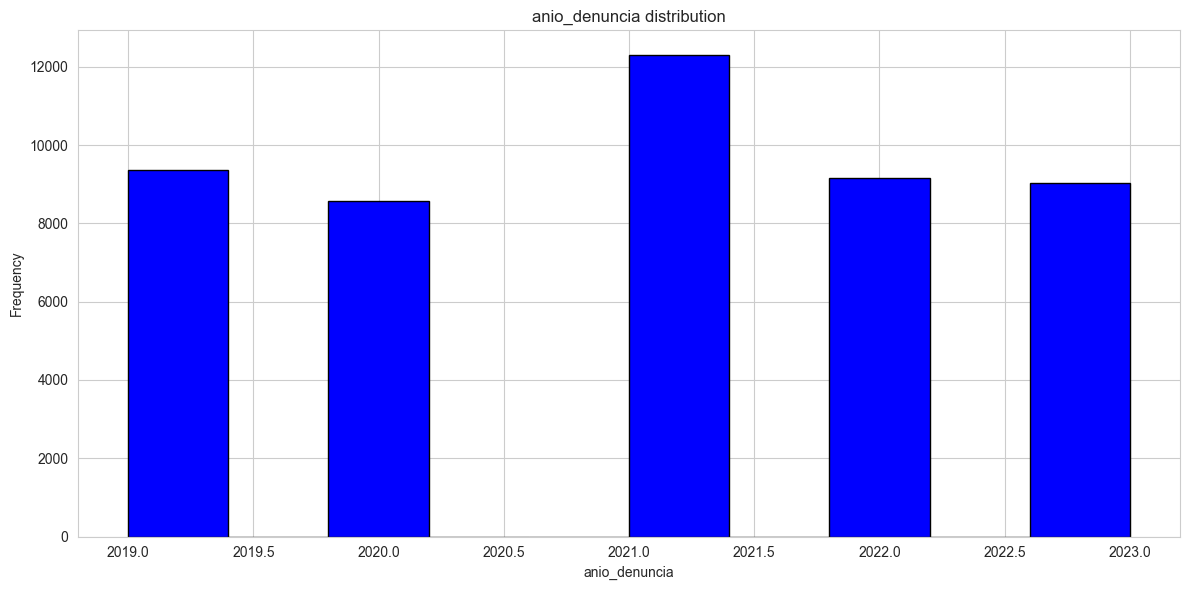

Statistics for anio_denuncia:
Q1 - 1.5IQR = 2017.00
Q1 = 2020.00
Mediana = 2021.00
Q3 = 2022.00
Q3 + 1.5IQR = 2025.00
#Observations: 48444
#Outliers: 0


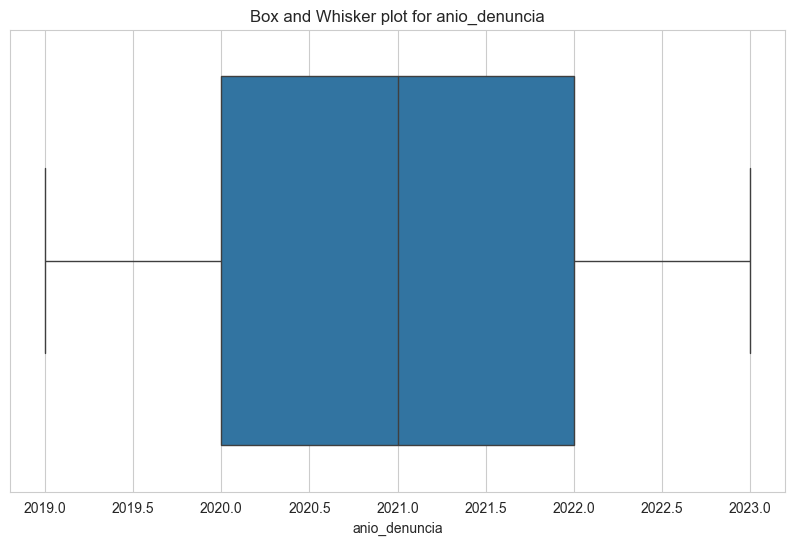

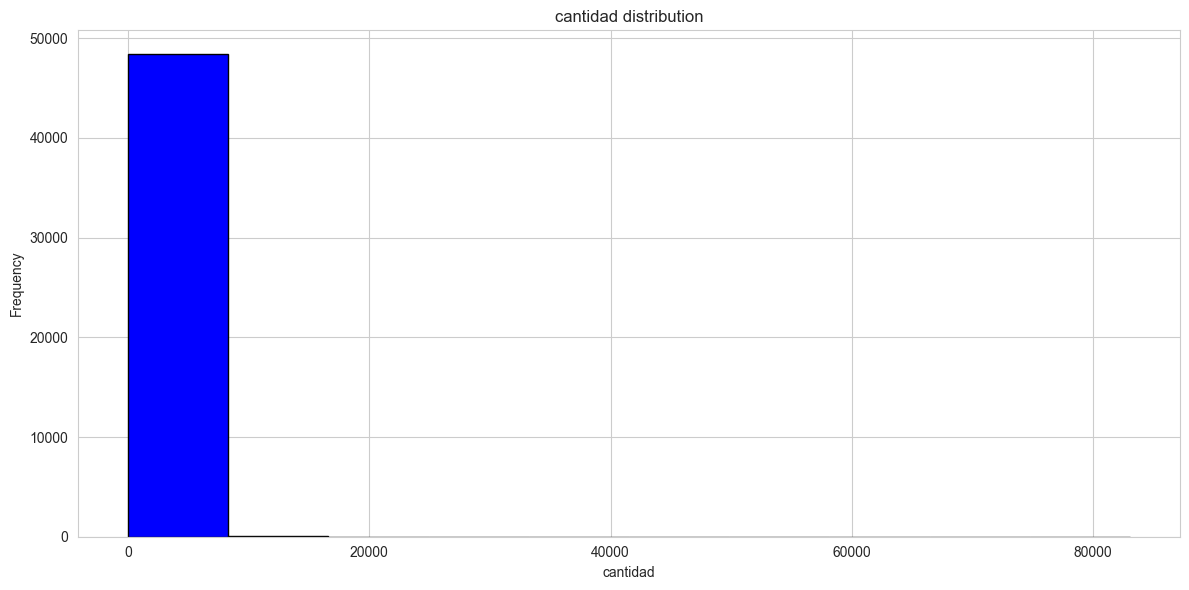

Statistics for cantidad:
Q1 - 1.5IQR = -31.00
Q1 = 2.00
Mediana = 5.00
Q3 = 24.00
Q3 + 1.5IQR = 57.00
#Observations: 48444
#Outliers: 7892


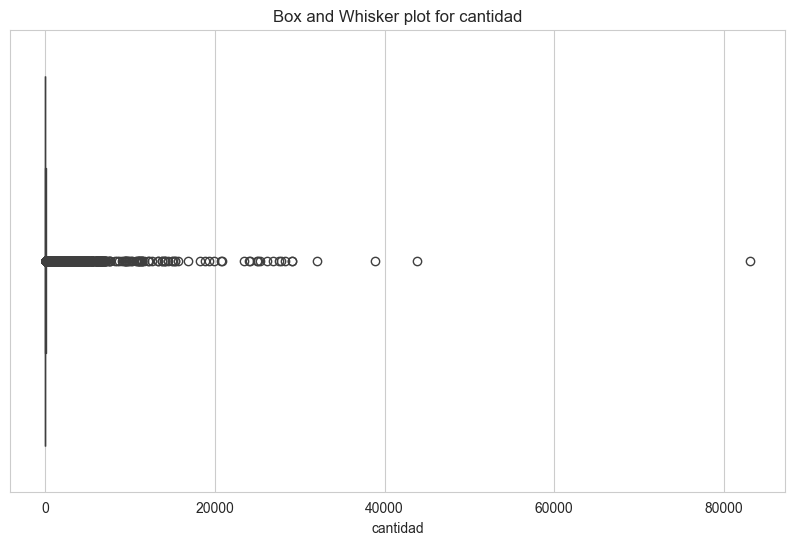

In [58]:
for col in numeric_cols:
    plt.hist(delitos[col], color='blue', edgecolor='black')
    plt.title(f'{col} distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


    import seaborn as sns
    # Statistics needed to reproduce the boxplot
    Q1 = delitos[col].quantile(0.25)
    Q3 = delitos[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Statistics for {col}:")
    print(f"Q1 - 1.5IQR = {lower_bound:.2f}")
    print(f"Q1 = {Q1:.2f}")
    print(f"Mediana = {delitos[col].median():.2f}")
    print(f"Q3 = {Q3:.2f}")
    print(f"Q3 + 1.5IQR = {upper_bound:.2f}")
    print(f"#Observations: {len(delitos[col])}")
    print(f"#Outliers: {sum((delitos[col] < lower_bound) | (delitos[col] > upper_bound))}")

    # Construcción del gráfico de cajas y bigotes
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=delitos[col])
    plt.title(f"Box and Whisker plot for {col}")
    plt.xlabel(col)
    plt.show()

# Correlation analysis

Numeric variables: ['anio_denuncia', 'cantidad']

Categorical variables to include:
  • distrito_fiscal: 34 categorías
  • generico: 28 categorías
  • subgenerico: 112 categorías
  • articulo: 463 categorías
  • des_articulo: 557 categorías
  • ubigeo_pjfs: 34 categorías
  • dpto_pjfs: 25 categorías
  • prov_pjfs: 30 categorías
  • dist_pjfs: 34 categorías

Total variables: 11


C:\Users\lucad\AppData\Local\Temp\ipykernel_13348\3487397697.py:18: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(delitos[col]):
C:\Users\lucad\AppData\Local\Temp\ipykernel_13348\3487397697.py:18: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(delitos[col]):
C:\Users\lucad\AppData\Local\Temp\ipykernel_13348\3487397697.py:18: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(delitos[col]):
C:\Users\lucad\AppData\Local\Temp\ipykernel_13348\3487397697.py:18: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.Cate

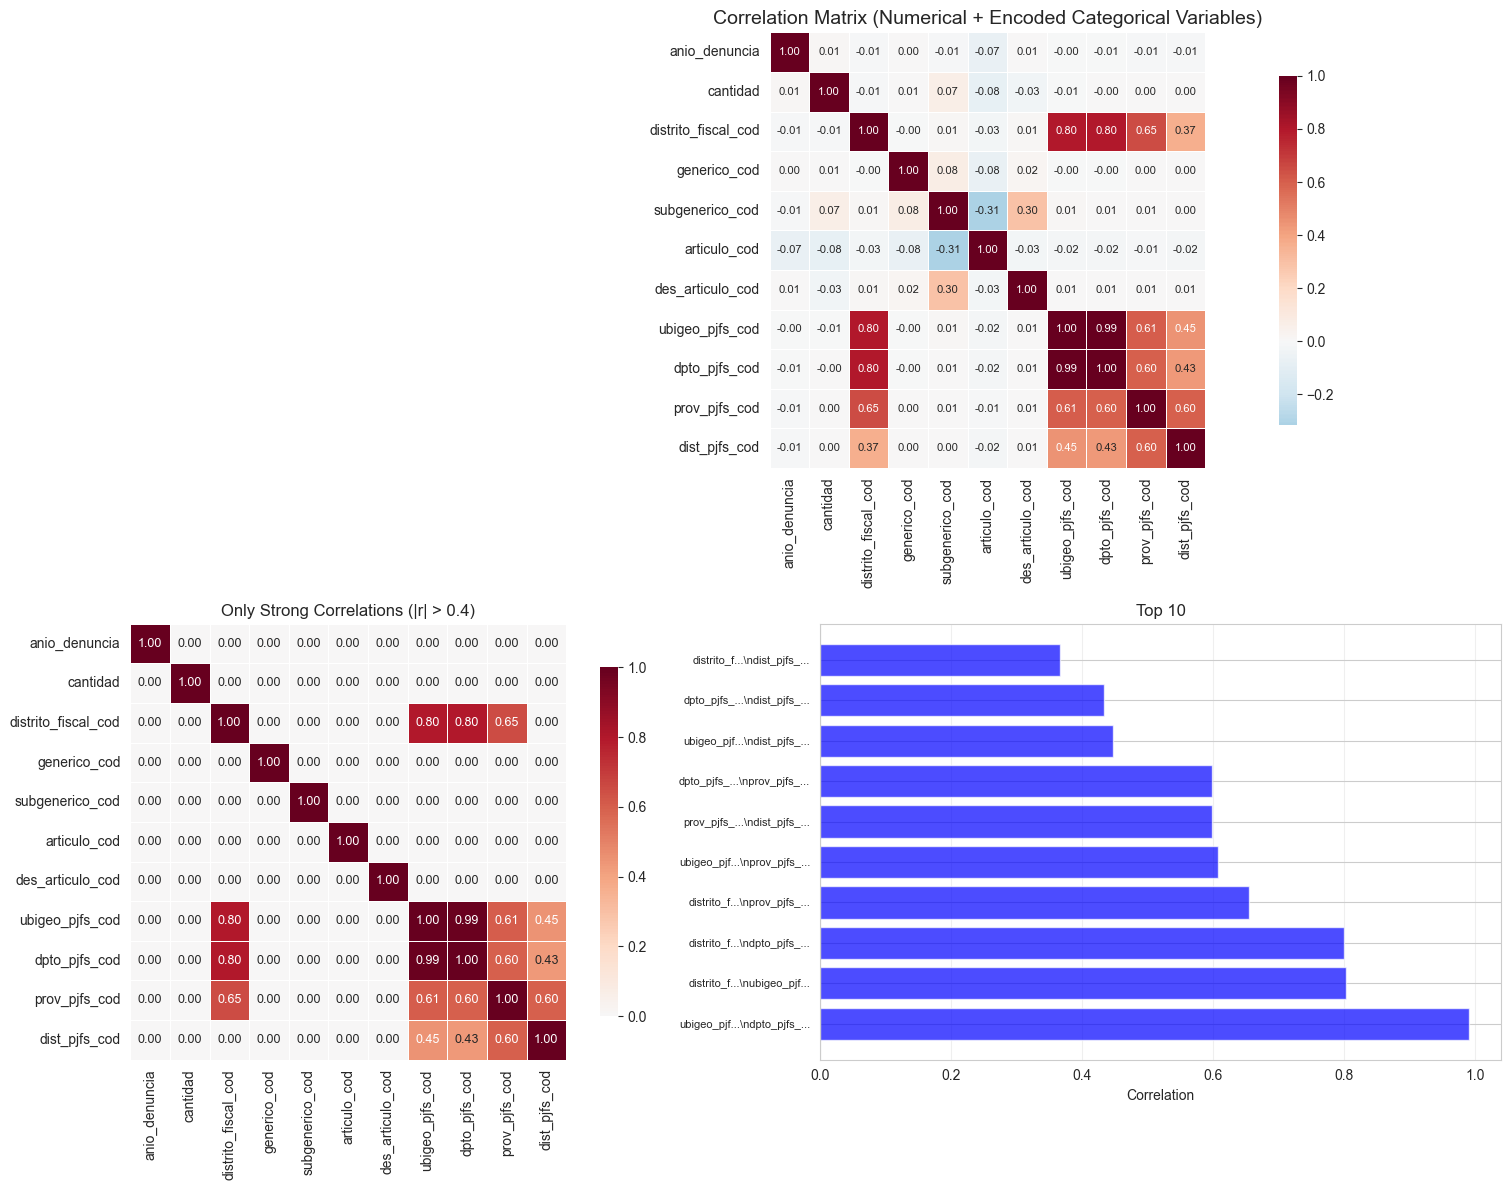


📊 RESUME:
• Total pairs analyzed: 55
• Strong correlations (|r| > 0.7): 3
• Moderate correlations (0.3 < |r| < 0.7): 8
• Weak correlations (|r| < 0.3): 44


In [59]:
# 1. Variables numéricas (como antes)
num_variables = delitos.select_dtypes(include=[np.number])
print(f"Numeric variables: {list(num_variables.columns)}")

# 2. Agregar variables categóricas codificadas
df_para_correlacion = num_variables.copy()

# Obtener variables categóricas con pocas categorías
cat_variables = delitos.select_dtypes(include=['object', 'category'])
le = LabelEncoder()

print(f"\nCategorical variables to include:")
for col in categorical_columns:
    n_unique = delitos[col].nunique()
    print(f"  • {col}: {n_unique} categorías")
    
    # Si es Categorical, agregar 'Sin_dato' a las categorías antes de fillna
    if pd.api.types.is_categorical_dtype(delitos[col]):
        if "No_data" not in delitos[col].cat.categories:
            delitos[col] = delitos[col].cat.add_categories(["No_data"])
    col_sin_nulos = delitos[col].fillna('No_data')
    df_para_correlacion[f"{col}_cod"] = le.fit_transform(col_sin_nulos)

print(f"\nTotal variables: {len(df_para_correlacion.columns)}")

# 3. Calcular correlaciones
correlacion = df_para_correlacion.corr()

# 4. Crear gráficos
plt.figure(figsize=(16, 12))

# Gráfico principal: Heatmap
plt.subplot(2, 2, (1, 2))
sns.heatmap(correlacion, annot=True, cmap='RdBu_r', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            fmt='.2f', annot_kws={'size': 8})
plt.title('Correlation Matrix (Numerical + Encoded Categorical Variables)', fontsize=14)

# Gráfico de correlaciones fuertes
plt.subplot(2, 2, 3)
correlacion_fuerte = correlacion.copy()
correlacion_fuerte[abs(correlacion_fuerte) < 0.4] = 0  # Solo correlaciones > 0.4

sns.heatmap(correlacion_fuerte, annot=True, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            fmt='.2f', annot_kws={'size': 9})
plt.title('Only Strong Correlations (|r| > 0.4)', fontsize=12)

# Top correlaciones en barras
plt.subplot(2, 2, 4)

# Extraer pares de correlaciones (sin diagonal)
pares_corr = []
for i in range(len(correlacion.columns)):
    for j in range(i+1, len(correlacion.columns)):
        if not np.isnan(correlacion.iloc[i, j]):
            pares_corr.append({
                'par': f"{correlacion.columns[i][:10]}...\\n{correlacion.columns[j][:10]}...",
                'valor': correlacion.iloc[i, j]
            })

# Ordenar por valor absoluto y tomar top 10
pares_corr = sorted(pares_corr, key=lambda x: abs(x['valor']), reverse=True)[:10]

labels = [p['par'] for p in pares_corr]
values = [p['valor'] for p in pares_corr]
colors = ['red' if v < 0 else 'blue' for v in values]

plt.barh(range(len(labels)), values, color=colors, alpha=0.7)
plt.yticks(range(len(labels)), labels, fontsize=8)
plt.xlabel('Correlation')
plt.title('Top 10', fontsize=12)
plt.axvline(0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# 5. Resumen
print(f"\n📊 RESUME:")
correlaciones_flat = correlacion.values[np.triu_indices_from(correlacion.values, k=1)]
correlaciones_flat = correlaciones_flat[~np.isnan(correlaciones_flat)]

print(f"• Total pairs analyzed: {len(correlaciones_flat)}")
print(f"• Strong correlations (|r| > 0.7): {sum(abs(c) > 0.7 for c in correlaciones_flat)}")
print(f"• Moderate correlations (0.3 < |r| < 0.7): {sum(0.3 < abs(c) < 0.7 for c in correlaciones_flat)}")
print(f"• Weak correlations (|r| < 0.3): {sum(abs(c) < 0.3 for c in correlaciones_flat)}")

In [60]:
for art in delitos['articulo'].unique():
    if pd.isna(art):
        continue
    print(f"Articulo: {art}")
    print(f"  - Total cases: {delitos[delitos['articulo'] == art].shape[0]}")
    print(f"  - Unique descriptions: {delitos[delitos['articulo'] == art]['des_articulo'].nunique()}")
    
    for des in delitos[delitos['articulo'] == art]['des_articulo'].unique():
        if pd.isna(des):
            continue
        print(f"  - Descripcion: {des}")
        print(f"    - Total cases: {delitos[(delitos['articulo'] == art) & (delitos['des_articulo'] == des)].shape[0]}")

    print("=" * 50)

Articulo: S/Art
  - Total cases: 6949
  - Unique descriptions: 106
  - Descripcion: CONTRA EL HONOR
    - Total cases: 80
  - Descripcion: INJURIA, CALUMNIA Y DIFAMACIÓN
    - Total cases: 87
  - Descripcion: CONTRA EL ORDEN FINANCIERO Y MONETARIO
    - Total cases: 52
  - Descripcion: DELITOS MONETARIOS
    - Total cases: 77
  - Descripcion: ABIGEATO
    - Total cases: 100
  - Descripcion: APROPIACIÓN ILÍCITA
    - Total cases: 138
  - Descripcion: CONTRA EL PATRIMONIO
    - Total cases: 145
  - Descripcion: DAÑOS
    - Total cases: 161
  - Descripcion: ESTAFA Y OTRAS DEFRAUDACIONES
    - Total cases: 142
  - Descripcion: EXTORSIÓN
    - Total cases: 119
  - Descripcion: HURTO
    - Total cases: 156
  - Descripcion: RECEPTACIÓN
    - Total cases: 126
  - Descripcion: ROBO
    - Total cases: 140
  - Descripcion: USURPACIÓN
    - Total cases: 170
  - Descripcion: DELITOS COMETIDOS POR FUNCIONARIOS PUBLICO
    - Total cases: 142
  - Descripcion: DELITOS COMETIDOS POR PARTICULARES
    - T